In [1]:
# 2-2. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [2]:
# (1) 데이터 가져오기

In [3]:
# 터미널에서 ~/data/data/bike-sharing-demand 경로에 
# train.csv 데이터를 train 변수로 가져 옵니다.

In [4]:
import pandas as pd

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.shape

(10886, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [9]:
# to_datetime 활용 : 링크 참조
# pandas datetime extract year month day 키워드로 검색해 보기

In [10]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['min'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  min         10886 non-

In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [13]:
# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

In [14]:
# sns.countplot 활용해서 시각화하기
# subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

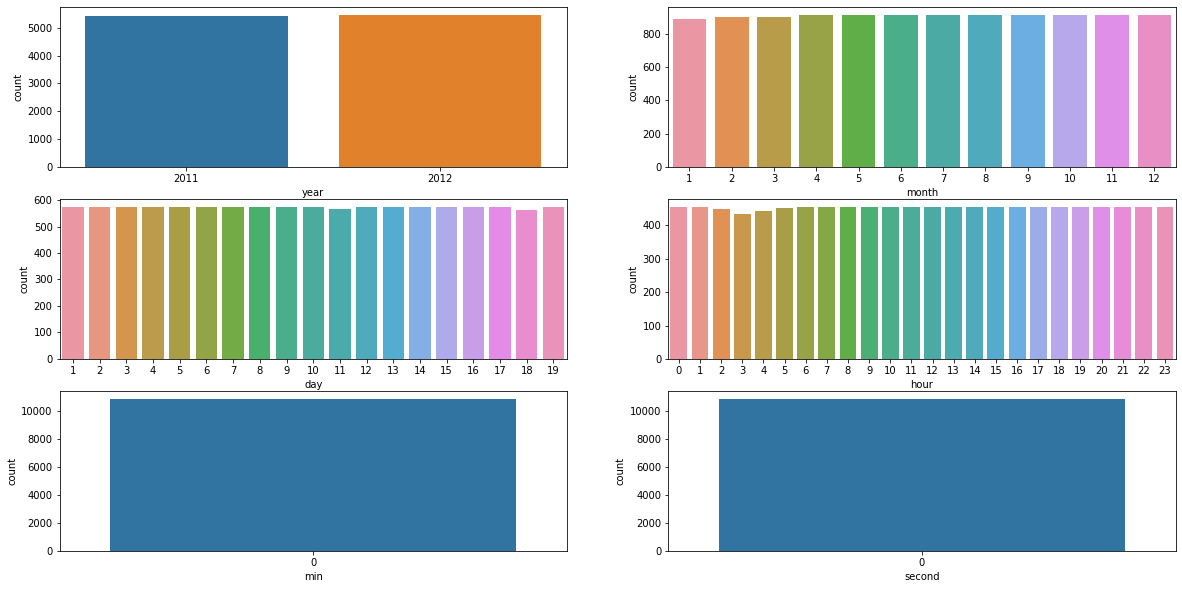

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plt.subplot(3, 2, 1)
sns.countplot(data=train, x='year')
plt.subplot(3, 2, 2)
sns.countplot(data=train, x='month')
plt.subplot(3, 2, 3)
sns.countplot(data=train, x='day')
plt.subplot(3, 2, 4)
sns.countplot(data=train, x='hour')
plt.subplot(3, 2, 5)
sns.countplot(data=train, x='min')
plt.subplot(3, 2, 6)
sns.countplot(data=train, x='second')
plt.show()

In [16]:
# 특성간 상관관계 분석
train.corr()['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
day           0.019826
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
min                NaN
second             NaN
Name: count, dtype: float64

In [17]:
# (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [18]:
# X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다.
# 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다.
# count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [35]:
from sklearn.model_selection import train_test_split

features = ['temp', 'humidity', 'windspeed', 'weather', 'registered']
X = train[features]
y = train['count']

In [36]:
X

,temp,humidity,windspeed,weather,registered
0,9.84,81,0.0000,1,13
1,9.02,80,0.0000,1,32
2,9.02,80,0.0000,1,27
3,9.84,75,0.0000,1,10
4,9.84,75,0.0000,1,1
...,...,...,...,...,...
10881,15.58,50,26.0027,1,329
10882,14.76,57,15.0013,1,231
10883,13.94,61,15.0013,1,164
10884,13.94,61,6.0032,1,117


In [37]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 5) (8708,)
(2178, 5) (2178,)


In [23]:
# (5) LinearRegression 모델 학습

In [24]:
# sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [27]:
# 학습된 모델에 X_test를 입력해서 예측값 출력하기
# 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
# mse 값과 함께 rmse 값도 계산하기

In [40]:
predictions = model.predict(X_test)
predictions

array([160.06283476,   2.17345432, 171.20994111, ..., 422.38621377,
        -8.0098964 , 254.44423026])

In [29]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

1531.4773150249482

In [41]:
rmse = mean_squared_error(y_test, predictions) ** 0.5
rmse

39.13409402330591

In [31]:
# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

In [32]:
# x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
# x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

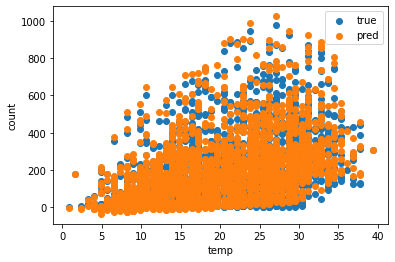

In [43]:
plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], predictions, label="pred")
plt.ylabel('count')
plt.xlabel('temp')
plt.legend()
plt.show()

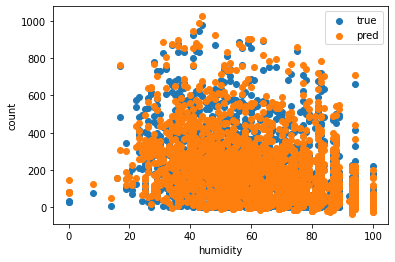

In [44]:
plt.scatter(X_test['humidity'], y_test, label="true")
plt.scatter(X_test['humidity'], predictions, label="pred")
plt.ylabel('count')
plt.xlabel('humidity')
plt.legend()
plt.show()